Evaluation Results on Standardized Features with SelectKBest (ANOVA F-value): {'SVM': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}, 'Decision Tree': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}, 'Logistic Regression': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}, 'KNN': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}}
Best Model: SVM
Evaluation Results on Standardized Features with SelectKBest (Mutual Information): {'SVM': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}, 'Decision Tree': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}, 'Logistic Regression': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}, 'KNN': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}}
Best Model: SVM


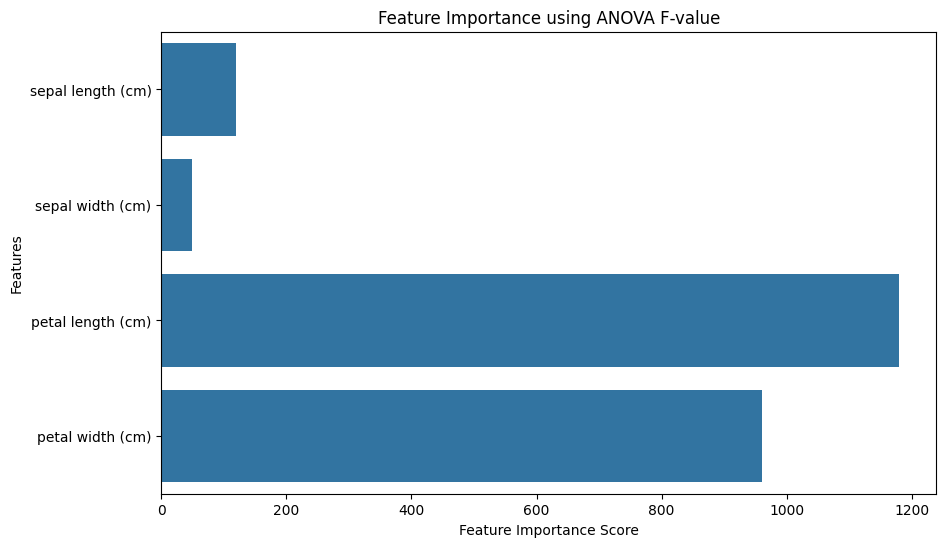

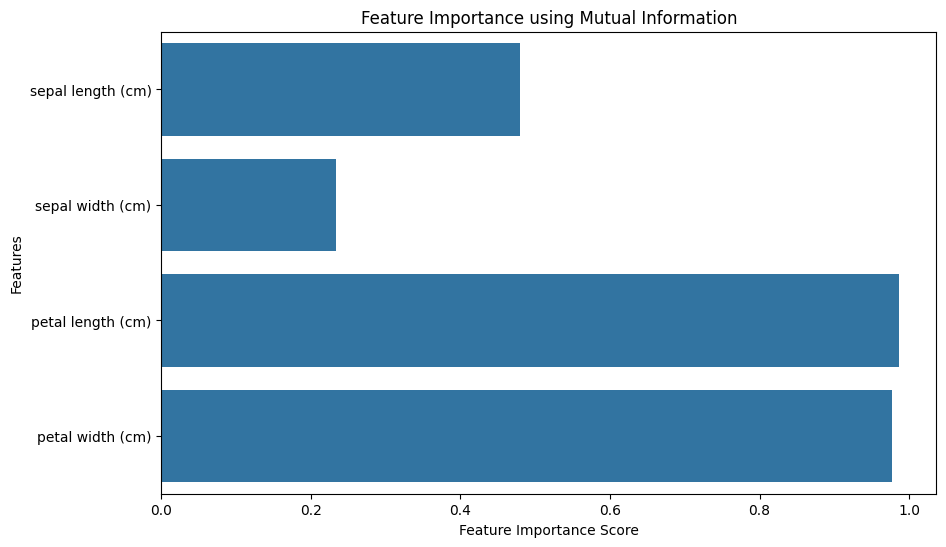

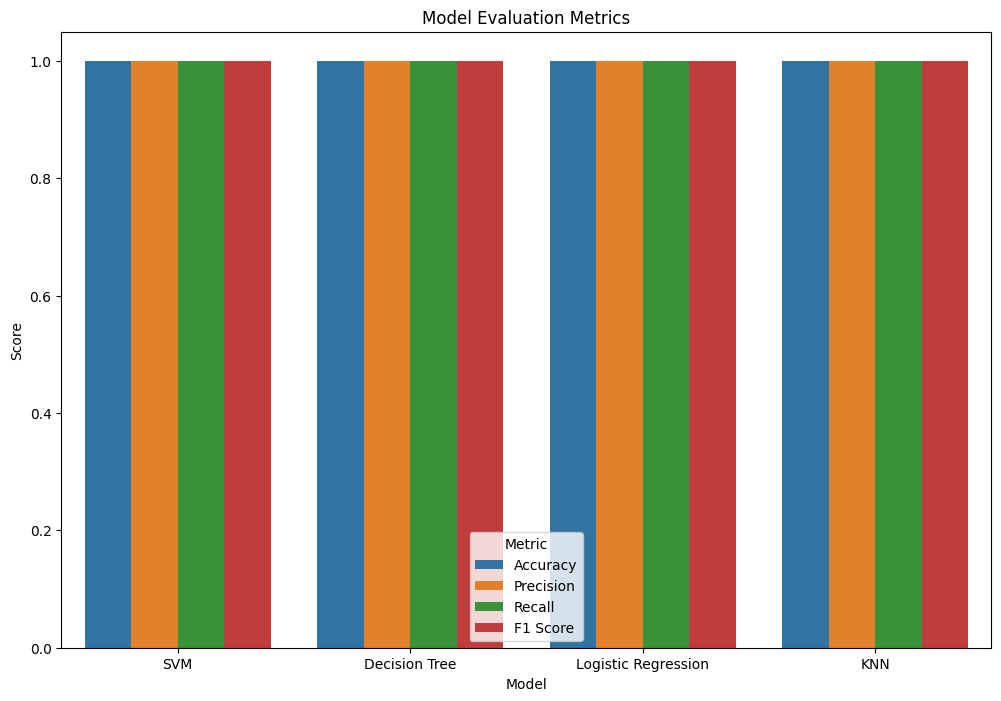

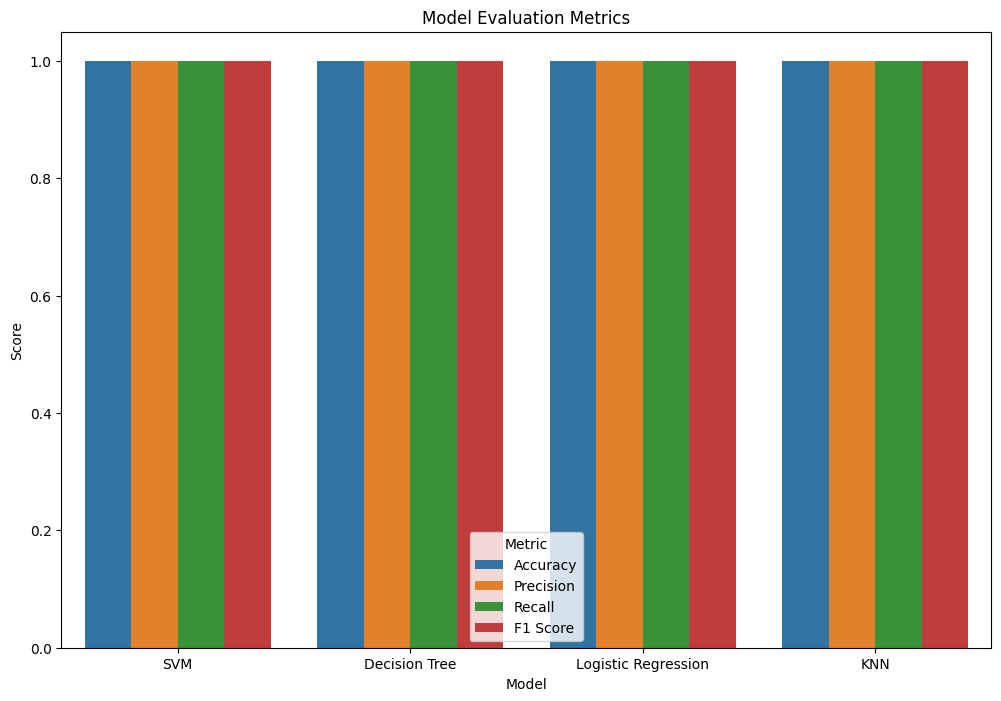

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
)
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif


# Step 1: Data Loading and Preprocessing
def load_and_preprocess_data():
    iris = load_iris()
    features = iris.data
    target = iris.target

    scaler = StandardScaler()
    features_standardized = scaler.fit_transform(features)

    min_max_scaler = MinMaxScaler()
    features_min_max_scaled = min_max_scaler.fit_transform(features)

    return features, features_standardized, features_min_max_scaled, target, iris


# Step 2: Feature Engineering
def feature_engineering(features, target):
    # SelectKBest example with ANOVA F-value
    selector_f_classif = SelectKBest(score_func=f_classif, k="all")
    features_f_classif = selector_f_classif.fit_transform(features, target)

    # SelectKBest example with mutual information
    selector_mutual_info = SelectKBest(score_func=mutual_info_classif, k="all")
    features_mutual_info = selector_mutual_info.fit_transform(features, target)

    return features_f_classif, features_mutual_info


# Step 3: Model Implementation
def implement_models(features, target):
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.3, random_state=42
    )

    # SVM
    svm_model = SVC()
    svm_model.fit(X_train, y_train)
    svm_pred = svm_model.predict(X_test)

    # Decision Tree
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train, y_train)
    dt_pred = dt_model.predict(X_test)

    # Logistic Regression
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)
    logreg_pred = logreg_model.predict(X_test)

    # KNN
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)

    return (svm_pred, dt_pred, logreg_pred, knn_pred, y_test)


def implement_models_using_cross_validation(features, target):
    models = {
        "SVM": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Logistic Regression": LogisticRegression(
            max_iter=1000
        ),  # Increased max_iter for convergence
        "KNN": KNeighborsClassifier(),
    }

    results = {}
    for model_name, model in models.items():
        # Perform cross-validation
        cv_scores = cross_val_score(model, features, target, cv=5, scoring="accuracy")
        # Collect mean accuracy and standard deviation
        results[model_name] = {
            "mean_accuracy": np.mean(cv_scores),
            "std_accuracy": np.std(cv_scores),
        }

    return results


# Step 4: Model Evaluation
def evaluate_models(svm_pred, dt_pred, logreg_pred, knn_pred, y_test):
    results = {}

    results["SVM"] = {
        "accuracy": accuracy_score(y_test, svm_pred),
        "precision": precision_score(y_test, svm_pred, average="weighted"),
        "recall": recall_score(y_test, svm_pred, average="weighted"),
        "f1_score": f1_score(y_test, svm_pred, average="weighted"),
    }

    results["Decision Tree"] = {
        "accuracy": accuracy_score(y_test, dt_pred),
        "precision": precision_score(y_test, dt_pred, average="weighted"),
        "recall": recall_score(y_test, dt_pred, average="weighted"),
        "f1_score": f1_score(y_test, dt_pred, average="weighted"),
    }

    results["Logistic Regression"] = {
        "accuracy": accuracy_score(y_test, logreg_pred),
        "precision": precision_score(y_test, logreg_pred, average="weighted"),
        "recall": recall_score(y_test, logreg_pred, average="weighted"),
        "f1_score": f1_score(y_test, logreg_pred, average="weighted"),
    }

    results["KNN"] = {
        "accuracy": accuracy_score(y_test, knn_pred),
        "precision": precision_score(y_test, knn_pred, average="weighted"),
        "recall": recall_score(y_test, knn_pred, average="weighted"),
        "f1_score": f1_score(y_test, knn_pred, average="weighted"),
    }

    return results


# Step 5: Model Selection
def select_best_model(results):
    best_model = max(
        results, key=lambda model: results[model].get("accuracy", -float("inf"))
    )
    return best_model


# Step 6: Visualizations
def plot_feature_importance(selector, feature_names, title):
    scores = selector.scores_
    plt.figure(figsize=(10, 6))
    sns.barplot(x=scores, y=feature_names)
    plt.title(title)
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.show()


def plot_results(results):
    models = list(results.keys())
    accuracies = [results[model]["accuracy"] for model in models]
    precisions = [results[model]["precision"] for model in models]
    recalls = [results[model]["recall"] for model in models]
    f1_scores = [results[model]["f1_score"] for model in models]

    metrics_df = pd.DataFrame(
        {
            "Model": models,
            "Accuracy": accuracies,
            "Precision": precisions,
            "Recall": recalls,
            "F1 Score": f1_scores,
        }
    )

    metrics_df_melted = metrics_df.melt(
        id_vars="Model", var_name="Metric", value_name="Score"
    )

    plt.figure(figsize=(12, 8))
    sns.barplot(data=metrics_df_melted, x="Model", y="Score", hue="Metric")
    plt.title("Model Evaluation Metrics")
    plt.ylabel("Score")
    plt.show()


# Main Program
features, features_standardized, features_min_max_scaled, target, iris = (
    load_and_preprocess_data()
)
features_f_classif, features_mutual_info = feature_engineering(
    features_standardized, target
)

# Implement models on standardized features with SelectKBest (ANOVA F-value)
svm_pred, dt_pred, logreg_pred, knn_pred, y_test = implement_models(
    features_f_classif, target
)
results_f_classif = evaluate_models(svm_pred, dt_pred, logreg_pred, knn_pred, y_test)
best_model_f_classif = select_best_model(results_f_classif)

print(
    f"Evaluation Results on Standardized Features with SelectKBest (ANOVA F-value): {results_f_classif}"
)
print(f"Best Model: {best_model_f_classif}")

# Implement models on standardized features with SelectKBest (Mutual Information)
svm_pred, dt_pred, logreg_pred, knn_pred, y_test = implement_models(
    features_mutual_info, target
)
results_mutual_info = evaluate_models(svm_pred, dt_pred, logreg_pred, knn_pred, y_test)
best_model_mutual_info = select_best_model(results_mutual_info)

print(
    f"Evaluation Results on Standardized Features with SelectKBest (Mutual Information): {results_mutual_info}"
)
print(f"Best Model: {best_model_mutual_info}")

# Plot feature importance
plot_feature_importance(
    SelectKBest(score_func=f_classif, k="all").fit(features_standardized, target),
    iris.feature_names,
    "Feature Importance using ANOVA F-value",
)
plot_feature_importance(
    SelectKBest(score_func=mutual_info_classif, k="all").fit(
        features_standardized, target
    ),
    iris.feature_names,
    "Feature Importance using Mutual Information",
)

# Plot evaluation results
plot_results(results_f_classif)
plot_results(results_mutual_info)